In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import signal
from scipy.signal import find_peaks

import obspy
from obspy.signal.detrend import polynomial
style.use('ggplot')

import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [122]:
# 초기 변수

sampling_rate = 2000
event_size = 36
start_time = 8 # Video Start Time
user_time = [12, 16] # First event appearance time for each user

# Event 정리 #

event = np.zeros(event_size)

for i in range(event_size) :
    if(i==0) : 
        event[i] = 9
    else :
        event[i] = event[i-1] + 16

event = event.astype(np.int) # type conversion : floating -> integer
print("* Data Event *")
print(event)


pleasant = [2,4,7,10,13,17,19,22,26,28,31,36]
unpleasant = [3,6,8,12,15,18,20,23,25,29,33,35]
neutral = [1,5,9,11,14,16,21,24,27,30,32,34]


video_index = []

for i in range(1,event_size+1) :
    if i in neutral :
        video_index.append(0) # neutral index = 0
    elif i in pleasant : 
        video_index.append(1) # pleasant index = 1
    elif i in unpleasant :
        video_index.append(2) # unpleasant index = 2

print("\n* Video Event by emotion *")
print(video_index)

* Data Event *
[  9  25  41  57  73  89 105 121 137 153 169 185 201 217 233 249 265 281
 297 313 329 345 361 377 393 409 425 441 457 473 489 505 521 537 553 569]

* Video Event by emotion *
[0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1]


In [140]:
# Read data #

# User 1 #
user1 = pd.read_csv('data1.txt', sep = '	',header=None,names = ['HeartR', 'GSR', 'NAN'])
user1 = user1.drop('NAN', axis=1)
user1 = user1[sampling_rate * (user_time[0]-event[0]):]
user1 = user1.values
user1 = pd.DataFrame(user1,columns = ['HeartR', 'GSR'] )
user1_hr = user1['HeartR']

user1_hr = user1_hr.rolling(window=800).mean()
user1_hr = user1_hr.dropna()
user1_hr = user1_hr.values

# Apply dtrend
for i in range(20000, len(user1_hr),20000) :
    user1_hr[i-20000:i] = polynomial(user1_hr[i-20000:i], order=5, plot=False) # Dtrend
    
    if(i+20000 > len(user1_hr)) : 
        user1_hr[i:] = polynomial(user1_hr[i:], order=5, plot=False) # Dtrend
        break;
        
        
        
# User 2 #
user2 = pd.read_csv('data2.txt', sep = '	',header=None,names = ['HeartR', 'GSR', 'NAN'])
user2 = user2.drop('NAN', axis=1)
user2 = user2[sampling_rate * (user_time[1]-event[0]):] 
user2 = user2.values
user2 = pd.DataFrame(user2,columns = ['HeartR', 'GSR'] )
user2_hr = user2['HeartR']

user2_hr = user2_hr.rolling(window=800).mean()
user2_hr = user2_hr.dropna()
user2_hr = user2_hr.values

for i in range(20000, len(user2_hr),20000) :
    user2_hr[i-20000:i] = polynomial(user2_hr[i-20000:i], order=5, plot=False) # Dtrend
    
    if(i+20000 > len(user2_hr)) : 
        user2_hr[i:] = polynomial(user2_hr[i:], order=5, plot=False) # Dtrend
        break;

In [141]:
# User 1 #
vHeart_u1 = [] # videoHeart_user1
vHeart_u1.append([]) # for plesant
vHeart_u1.append([]) # for neutral
vHeart_u1.append([]) # for unplesant

# User 2 #
vHeart_u2 = [] # videoHeart_user1
vHeart_u2.append([]) # for plesant
vHeart_u2.append([]) # for neutral
vHeart_u2.append([]) # for unplesant

In [142]:
# Categorizing by data subject #

# User 1 #
for events,index in zip(event, range(event_size)) :
    # [3 seconds before event ~ 6 seconds after event] 
    vHeart_u1[video_index[index]].append((user1_hr[sampling_rate*(events-3):sampling_rate*(events+6)+1]).tolist()) 
    
# User 2 #
for events,index in zip(event, range(event_size)) :
    # 3 seconds before event ~ 6 seconds after event] 
    vHeart_u2[video_index[index]].append((user2_hr[sampling_rate*(events-3):sampling_rate*(events+6)+1]).tolist()) 

**************** Neutral ****************

max_peak : 0.166859934344
max_peak_index : 10906
[ 1144  2845  4541  6195  8000 10906 16920 17713]
pleasant or unpleasant


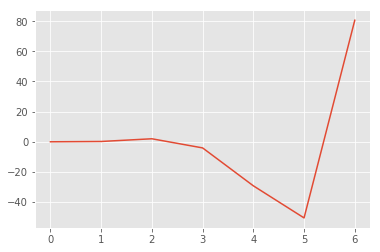



max_peak : 0.219193570969
max_peak_index : 9981
[  804  2246  3748  5272  6972  8455  9981 11543 13015 16084 17476]
pleasant or unpleasant


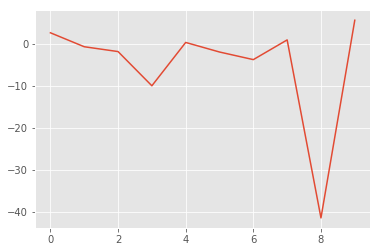



max_peak : 0.154436872801
max_peak_index : 17583
[  676  2311  5498  7130  8743 10236 12000 13265 14739 16127 17583]
pleasant or unpleasant


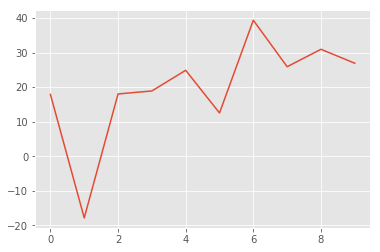



max_peak : 0.147625924303
max_peak_index : 11261
[  175  1703  3227  4731  6288  8000  9577 11261 13062 14884 16596]
pleasant or unpleasant


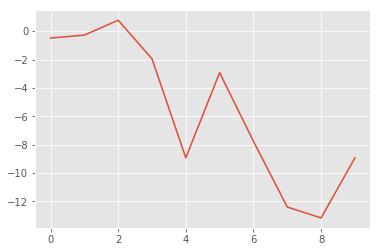



max_peak : 0.110190028759
max_peak_index : 16806
[  600  2041  3536  5130  6864  8504 10249 12000 13647 15209 16806]
pleasant or unpleasant


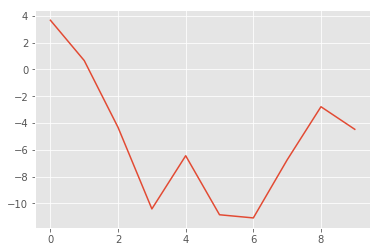



max_peak : 0.0689056218623
max_peak_index : 16546
[  402  3545  5090  7928  9216 10660 12070 13496 14986 16546 17994]
pleasant or unpleasant


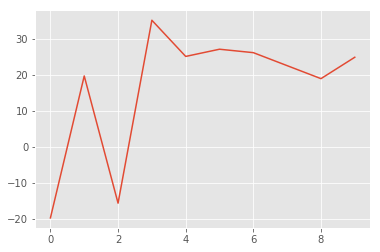



max_peak : 0.102713885675
max_peak_index : 1484
[ 1484  3216  4870  6578  7999  8651 10069 11715 13338 14944 16508]
pleasant or unpleasant


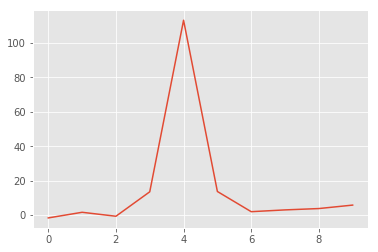



max_peak : 0.219878430997
max_peak_index : 17474
[ 1309  2878  4631  6471  8142  9756 11396 12000 12979 14438 15937 17474]
pleasant or unpleasant


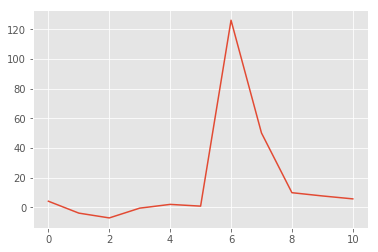



max_peak : 0.144897659427
max_peak_index : 17818
[  304  1808  3453  5015  6713  8450 10019 11628 13226 14800 15999 17818]
pleasant or unpleasant


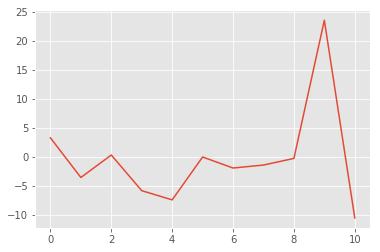



max_peak : 0.135417479607
max_peak_index : 14254
[ 1011  2601  4171  5567  6952  8388  9900 11309 12759 14254 17288]
pleasant or unpleasant


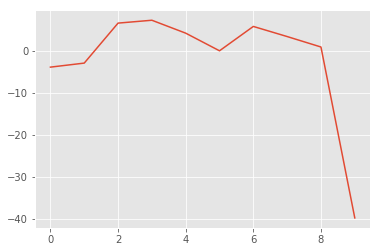



max_peak : 0.0749134512803
max_peak_index : 3653
[  493  2066  3653  5167  6694  8252  9737 11156 12592 14066 16846]
pleasant or unpleasant


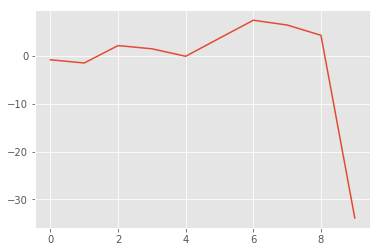



max_peak : 0.0788806759624
max_peak_index : 1791
[ 1791  3468  4581  5955  7283  8621  9995 11489 11999 12878 14208 16012
 17242]
pleasant or unpleasant


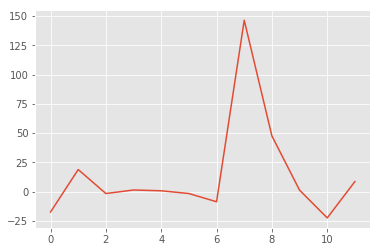



**************** Pleasant ****************

max_peak : 0.0728086701873
max_peak_index : 11059
[  114  1792  3396  5005  8033  9547 11059 12585 14203 15841 17470]
pleasant or unpleasant


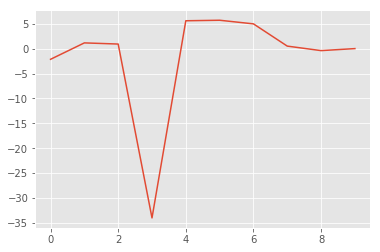



max_peak : 0.14219675935
max_peak_index : 17439
[  960  3886  5368  6877  8288  9786 11335 12000 12891 14381 15901 17439]
pleasant or unpleasant


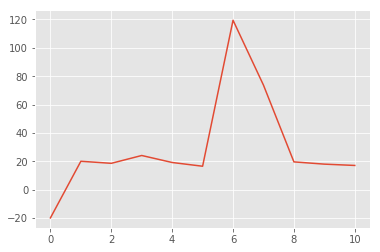



max_peak : 0.13607021353
max_peak_index : 6184
[   53  1641  3215  6184  7725  9280 12093 13479 14852 15999 17771]
pleasant or unpleasant


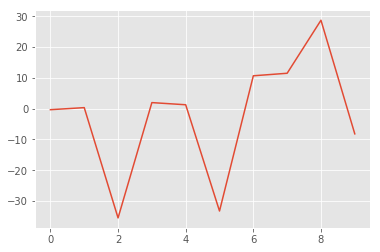



max_peak : 0.222722671076
max_peak_index : 16176
[ 1421  3104  4765  6497  8180  9906 11691 13289 14708 16176 17729]
pleasant or unpleasant


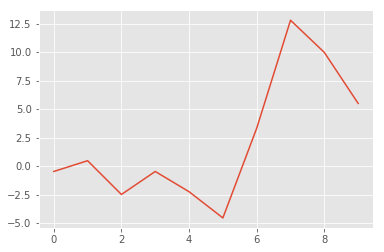



max_peak : 0.266632352428
max_peak_index : 14639
[ 1619  3217  4959  6692  8372 10065 11624 13123 14639 16295]
pleasant or unpleasant


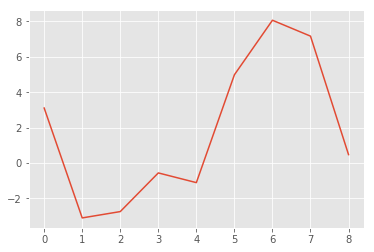



max_peak : 0.150307219129
max_peak_index : 14267
[  276  1763  3370  5041  6631  8222  9814 11321 12781 14267 15722 17136]
pleasant or unpleasant


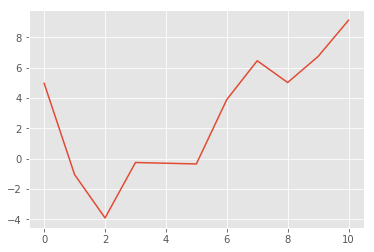



max_peak : 0.141275592485
max_peak_index : 6415
[  208  1738  3213  4789  6415  8137  9645 11286 13012 14464 16068 17640]
pleasant or unpleasant


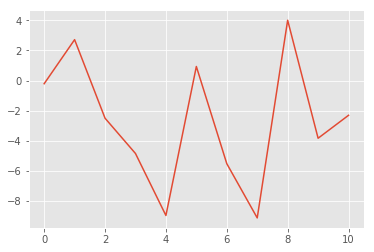



max_peak : 0.120315303381
max_peak_index : 9942
[  520  1979  3592  5238  6894  8384  9942 11543 13178 14766 16449]
pleasant or unpleasant


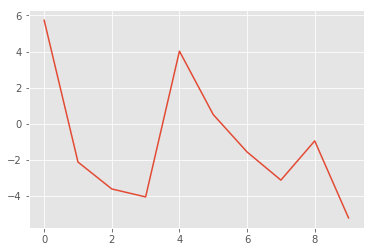



max_peak : 0.158477173765
max_peak_index : 16113
[ 1098  2551  4065  5600  7143  8598 10116 11668 13164 14634 16113 17602]
pleasant or unpleasant


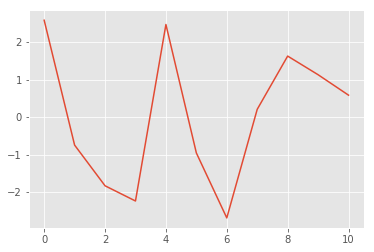



max_peak : 0.204913722367
max_peak_index : 3122
[ 1489  3122  4786  6318  7752  9161 10629 12247 13849 15361 16978]
pleasant or unpleasant


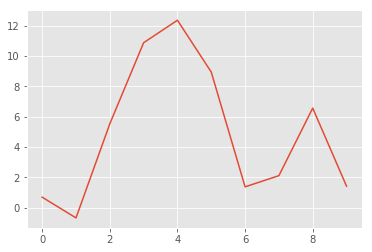



max_peak : 0.135571445738
max_peak_index : 4656
[  407  1799  3231  4656  6300  7999  9705 11234 12847 14546 16096 17620]
pleasant or unpleasant


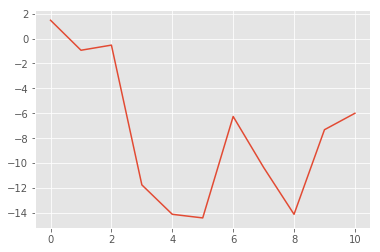



max_peak : 0.108488849923
max_peak_index : 2550
[ 2550  4054  5618  7209  7999  8627 10168 11715 13235 14794 16377 17887]
pleasant or unpleasant


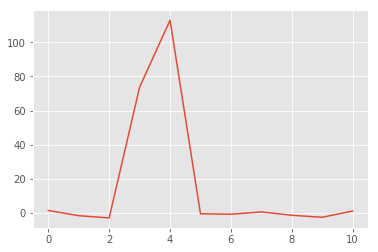



**************** Unpleasant ****************

max_peak : 0.161871454928
max_peak_index : 14304
[  529  2309  3987  5743  7478  9233 10923 12641 14304 15905 17435]
pleasant or unpleasant


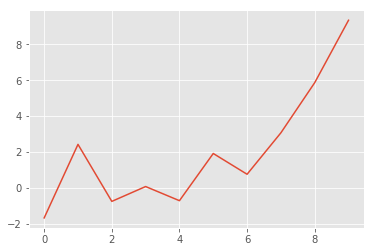



max_peak : 0.0984083487586
max_peak_index : 14462
[  752  2281  5334  6780  8366  9847 11316 13342 14462 15972 17418]
pleasant or unpleasant


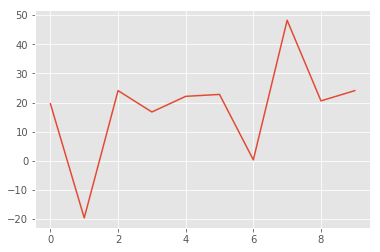



max_peak : 0.18032022436
max_peak_index : 12193
[ 1239  2797  3999  5901  7509  9050 10560 12193 13905 15651]
pleasant or unpleasant


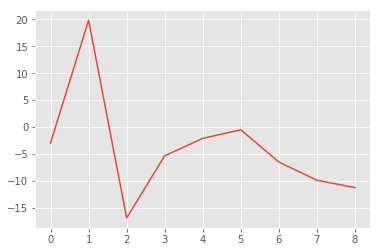



max_peak : 0.0878456585877
max_peak_index : 14594
[ 1435  3162  4718  6385  8079  9767 11357 12984 14594 16270 17833]
pleasant or unpleasant


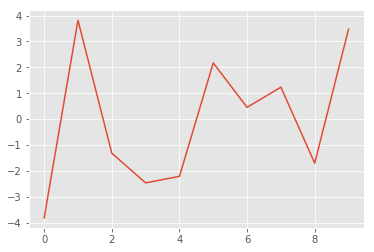



max_peak : 0.094460488434
max_peak_index : 15034
[  227  1644  3139  4600  6023  7621  9066 10536 12068 13615 15034 16535]
pleasant or unpleasant


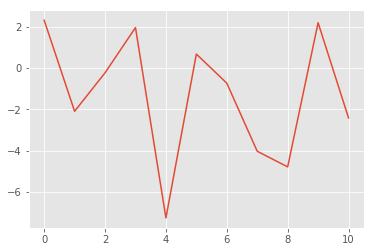



max_peak : 0.205264330245
max_peak_index : 16597
[  924  2442  4000  5595  7098  8659 10341 12003 13581 15063 16597]
pleasant or unpleasant


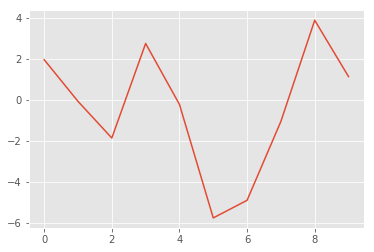



max_peak : 0.176415448012
max_peak_index : 17398
[ 1419  3038  4574  6223  7903  9524 11067 12567 14170 17398]
pleasant or unpleasant


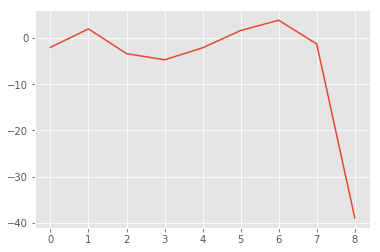



max_peak : 0.143317580195
max_peak_index : 11054
[  391  1991  3504  5055  6649  8176  9605 11054 12593 14238 15880 17475]
pleasant or unpleasant


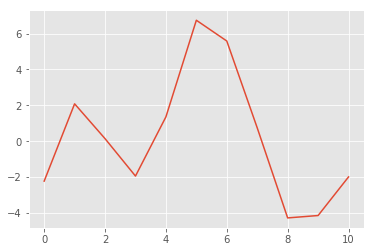



max_peak : 0.264719906214
max_peak_index : 4515
[ 1081  2771  4515  6222  9477 11091 12624 14224 15865 17512]
pleasant or unpleasant


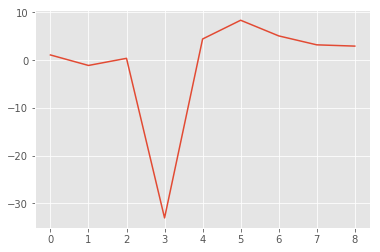



max_peak : 0.123633848205
max_peak_index : 12621
[  366  2045  3721  5247  6846  8349  9806 11207 12621 14273 15734 17235]
pleasant or unpleasant


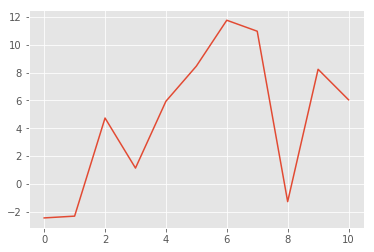



max_peak : 0.0756341601462
max_peak_index : 1506
[ 1506  2046  2717  4074  5399  6897  8389  9815 11267 12740 14127 15519
 16932]
pleasant or unpleasant


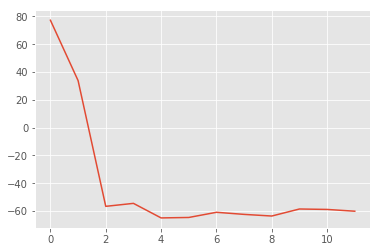



max_peak : 0.128051239236
max_peak_index : 8362
[ 1106  2528  4029  8362  9782 11259 12727 14273 15858 17336]
pleasant or unpleasant


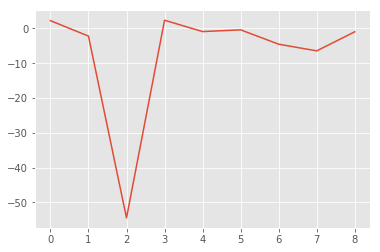

In [126]:
# Compute Heart Rate & show graph for user1 # 

Heart_result_u1=[] 
Heart_result_u1.append([])
Heart_result_u1.append([])
Heart_result_u1.append([])
user1_threshold = 0.01


for i in range(len(vHeart_u1)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
    for j in range(len(vHeart_u1[i])) :
        _peaks, _ = find_peaks(vHeart_u1[i][j], height=user1_threshold, distance=500)
        
        # Find Max Peak
        if len(_peaks) != 0 : # When there is more than one peak
            peak_value = [] # list for peak's y value
            
            for peak_index in _peaks :
                peak_value.append(vHeart_u1[i][j][peak_index]) # peak's y value
                
            max_peak = np.max(peak_value) 
            max_peak_index = _peaks[peak_value.index(max_peak)]
            print("max_peak :",max_peak)
            print("max_peak_index :", max_peak_index)
                
        # Compute heart rate using distance between peaks
        vHeart_u1[i][j] = [60 / ((_peaks[t] - _peaks[t-1])/2000) for t in range(1, len(_peaks))]

        peak_sec = [_peaks/2000 for _peaks in _peaks if _peaks/2000 <= 3]
        peak_befo = peak_sec.index(np.max(peak_sec)) # peak index before 3s
        peak_after = peak_befo + 1  # peak index after 3s

        # 이벤트 발생 3초전까지의 심박수를 이용해 평균 구하기
        # Compute average using heart rate of 3 seconds before event  
        avg_heart = np.mean(vHeart_u1[i][j][:peak_befo])
        
        # 구한 평균을 이용해 이벤트 발생 6초 후까지의 편차 구하기
        # Compute deviation of 6 seconds after event using heart rate average 
        vHeart_u1[i][j] = vHeart_u1[i][j] - avg_heart    

        plt.axis(option='auto')
        
        if(len(_peaks)>=1) : 
            print("pleasant or unpleasant")
            Heart_result_u1[i].append(1)
        else :
            print("neutral")
            Heart_result_u1[i].append(0)

        plt.plot(vHeart_u1[i][j])
        plt.show()
        print("\n")

**************** Neutral ****************

max_peak : 0.254779734127
max_peak_index : 71
[   71  1275  2473  3665  4815  5977  7188  8408  9641 10982 12158 13407
 14669 15938 17178]
pleasant or unpleasant


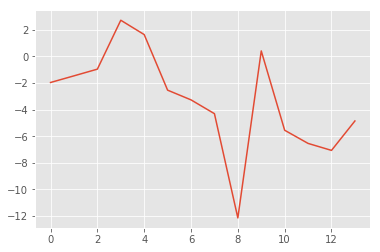



max_peak : 0.278890234946
max_peak_index : 7632
[ 1157  2444  3748  5060  6343  7632  8934 10292 11595 12913 14294 15690
 16997]
pleasant or unpleasant


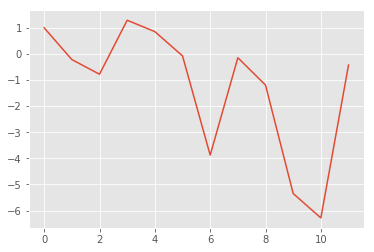



max_peak : 0.325569866813
max_peak_index : 16403
[  515  1887  3281  4758  6193  7601  9063 10589 11999 13513 15013 16403
 17878]
pleasant or unpleasant


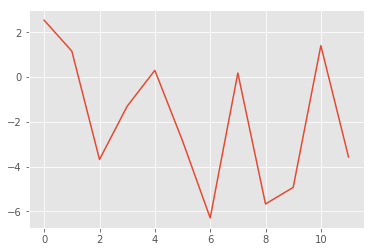



max_peak : 0.320261281355
max_peak_index : 3857
[ 1085  2440  3857  5300  6603  8000  9316 10625 11944 13241 14561 15932
 17344]
pleasant or unpleasant


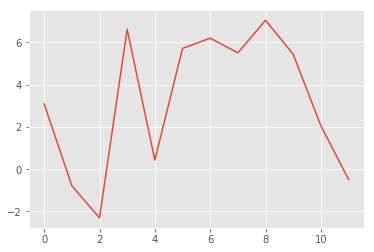



max_peak : 0.304172563922
max_peak_index : 11217
[  506  1791  3114  4441  5737  7057  8412  9776 11217 12623 13995 15374
 16731]
pleasant or unpleasant


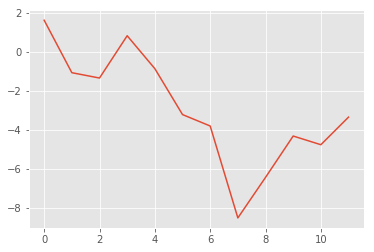



max_peak : 0.271375229638
max_peak_index : 17229
[  699  2039  3316  4598  5823  7111  7999  9543 10765 12030 13331 14595
 15879 17229]
pleasant or unpleasant


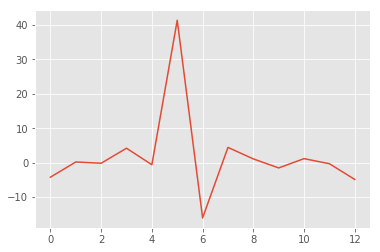



max_peak : 0.320372052488
max_peak_index : 17792
[  894  2131  3372  4632  5912  7224  8488  9784 11103 12464 13842 15131
 16430 17792]
pleasant or unpleasant


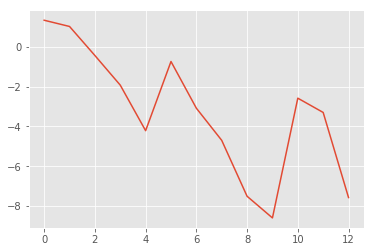



max_peak : 0.293558039911
max_peak_index : 3213
[  583  1906  3213  4513  5820  7073  8348  9626 10928 12253 13540 14869
 16200 17632]
pleasant or unpleasant


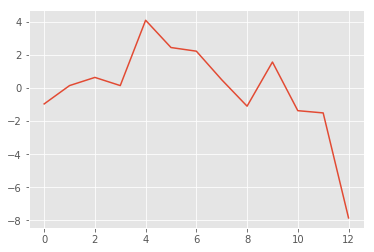



max_peak : 0.248054796556
max_peak_index : 10701
[   73  1221  2361  3525  4691  5858  7028  8208  9429 10701 11999 13261
 14537 15872 17186]
pleasant or unpleasant


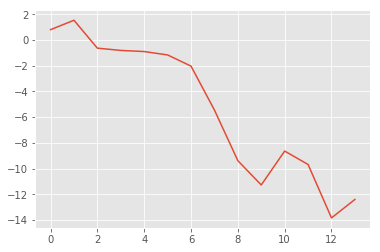



max_peak : 0.251005967444
max_peak_index : 13588
[  713  1865  4218  5358  6480  7642 12467 13588 14704 15927 17092]
pleasant or unpleasant


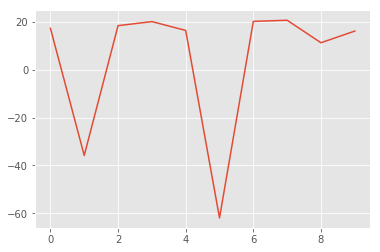



max_peak : 0.244383307474
max_peak_index : 9574
[  768  2010  3264  4527  5793  7019  8275  9574 10873 12257 13519 14765
 15989 17216]
pleasant or unpleasant


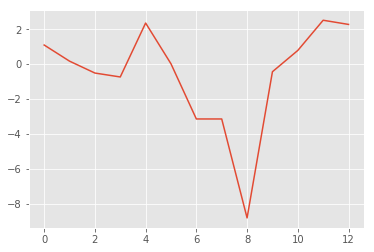



max_peak : 0.248908999804
max_peak_index : 13496
[  912  2187  3430  4677  5936  7199  8475  9719 10950 11999 13496 14743
 15995 17209]
pleasant or unpleasant


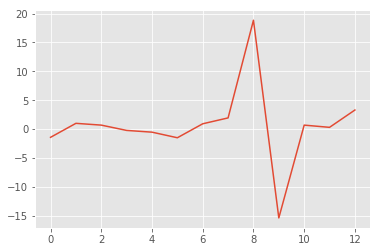



**************** Pleasant ****************

max_peak : 0.259841490378
max_peak_index : 6229
[  762  2190  3590  4900  6229  7604  9073 10601 12041 13618 15225 16776]
pleasant or unpleasant


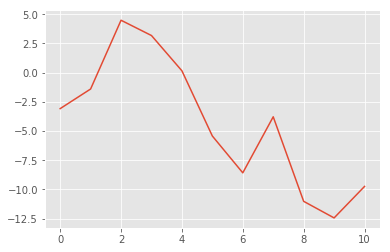



max_peak : 0.30675336956
max_peak_index : 1537
[   70  1537  3060  4518  5958  7408  8882 10237 11604 12994 14429 15744
 17138]
pleasant or unpleasant


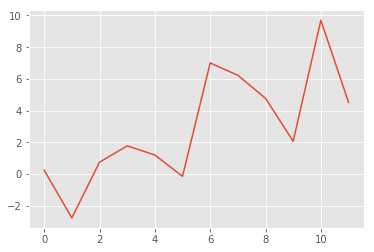



max_peak : 0.275363858583
max_peak_index : 13867
[  813  2100  3378  4653  5930  7237  8550  9824 11107 12443 13867 15328
 16644 17965]
pleasant or unpleasant


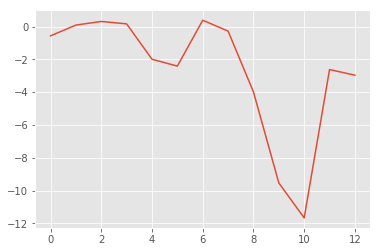



max_peak : 0.277619027012
max_peak_index : 2092
[  757  2092  3442  4815  6079  7353  8648  9993 11364 12670 13980 15310
 16662]
pleasant or unpleasant


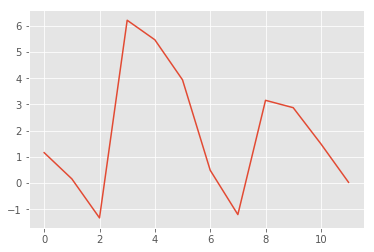



max_peak : 0.281123911709
max_peak_index : 14498
[  823  2080  3348  4545  5754  6958  8173  9406 10635 11860 13129 14498
 15833 17126]
pleasant or unpleasant


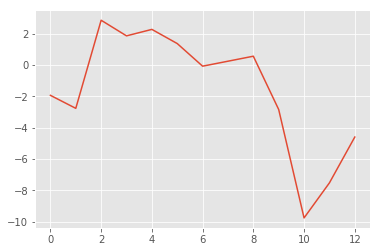



max_peak : 0.285444793869
max_peak_index : 13728
[  750  2086  3352  4611  5894  7199  8522  9815 11089 12374 13728 15065
 16348 17596]
pleasant or unpleasant


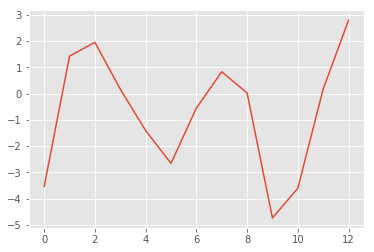



max_peak : 0.270198304342
max_peak_index : 16211
[    5  1322  2679  4078  5508  6842  8202  9559 10939 12255 13562 14892
 16211 17548]
pleasant or unpleasant


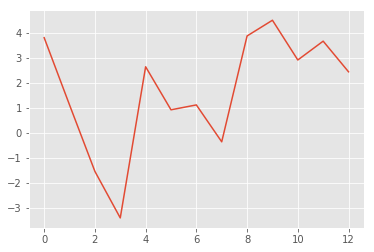



max_peak : 0.323560331747
max_peak_index : 6815
[  107  1467  2828  4158  5479  6815  8157  9505 10793 12080 13378 14673
 16000 17199]
pleasant or unpleasant


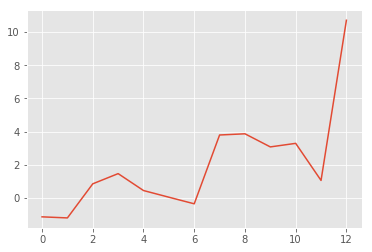



max_peak : 0.279034902043
max_peak_index : 6574
[  326  1560  2826  4083  5310  6574  8000  9151 10489 11762 13057 14373
 15752 17094]
pleasant or unpleasant


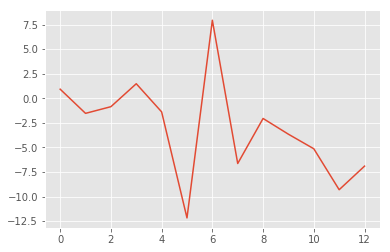



max_peak : 0.301874250586
max_peak_index : 12414
[ 1139  2389  3633  4897  6141  7390  8626  9860 11112 12414 13724 14986
 16249 17527]
pleasant or unpleasant


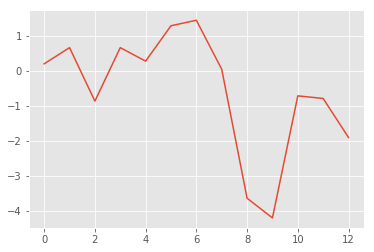



max_peak : 0.253694569476
max_peak_index : 16445
[   29  1261  2512  3782  5081  6329  7612  8900 10174 11468 12693 13927
 15172 16445 17709]
pleasant or unpleasant


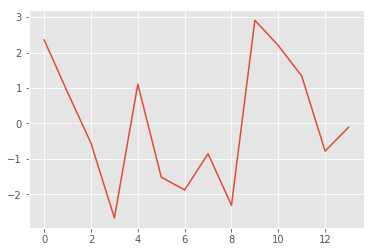



max_peak : 0.291541597962
max_peak_index : 17949
[  760  2037  3310  4606  5958  7339  8706 10045 11412 12753 14105 15388
 16660 17949]
pleasant or unpleasant


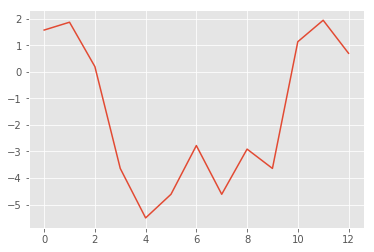



**************** Unpleasant ****************

max_peak : 0.292223150329
max_peak_index : 13421
[  559  2102  3660  5049  6435  7838  9255 10625 11947 13421 14910 16390
 17779]
pleasant or unpleasant


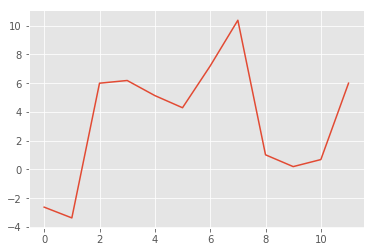



max_peak : 0.324967573081
max_peak_index : 12347
[   52  1360  2651  3975  5330  6737  8165  9543 10957 12347 13765 15179
 16475 17754]
pleasant or unpleasant


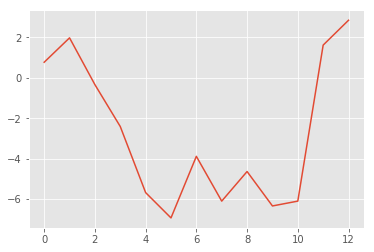



max_peak : 0.304484886712
max_peak_index : 832
[  832  2221  3662  5048  6450  7856  9272 10643 11979 13306 14725 16142
 17527]
pleasant or unpleasant


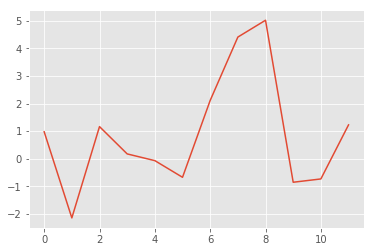



max_peak : 0.276844997332
max_peak_index : 9441
[  360  1660  2964  4292  5562  6796  8065  9441 10804 12110 13357 14600
 15794 17005]
pleasant or unpleasant


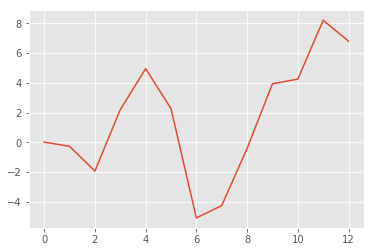



max_peak : 0.312964985462
max_peak_index : 12151
[  533  1846  3095  4355  5604  6845  8129  9452 10783 12151 13562 14986
 16329 17735]
pleasant or unpleasant


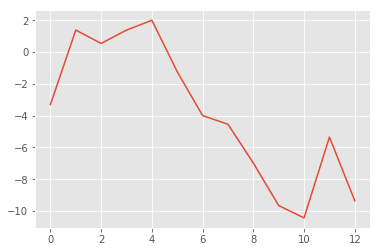



max_peak : 0.302615617144
max_peak_index : 6623
[   63  1355  2675  3999  5296  6623  7933  9284 10610 11890 13200 14547
 15915 17333]
pleasant or unpleasant


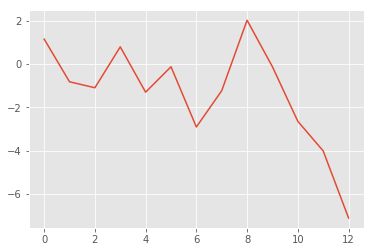



max_peak : 0.289312217238
max_peak_index : 17812
[  998  2189  3354  4513  5676  6844  7995  9163 10332 11510 12725 13946
 15192 16487 17812]
pleasant or unpleasant


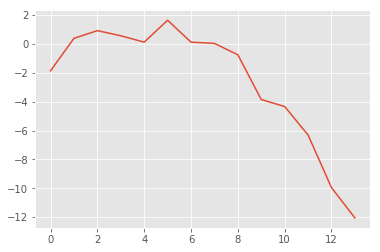



max_peak : 0.323780380606
max_peak_index : 15390
[  719  2041  3408  4691  6002  7322  8667 10041 11381 12695 14068 15390
 16699 17988]
pleasant or unpleasant


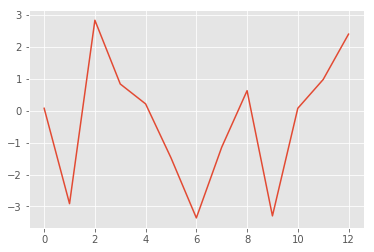



max_peak : 0.295146130128
max_peak_index : 12405
[  266  1452  2608  3804  4962  6173  7420  8650  9881 11136 12405 13694
 15017 16291 17577]
pleasant or unpleasant


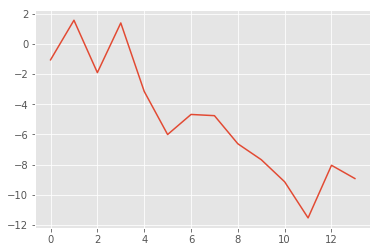



max_peak : 0.241528314538
max_peak_index : 6223
[   37  1270  2496  3730  4969  6223  7464  8803 10006 11230 12475 13764
 15079 16395 17671]
pleasant or unpleasant


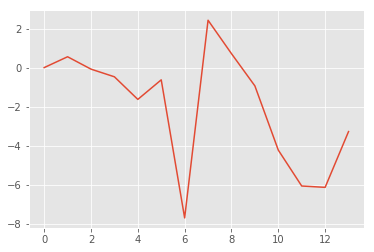



max_peak : 0.235230587145
max_peak_index : 13198
[  600  1813  3033  3999  5481  6756  8049  9310 10591 11880 13198 14540
 15871 17256]
pleasant or unpleasant


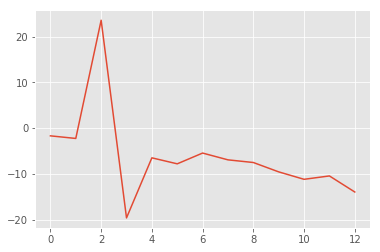



max_peak : 0.321508844534
max_peak_index : 8478
[  801  2118  3420  4698  5939  7189  8478  9807 11243 12687 14028 15380
 16760]
pleasant or unpleasant


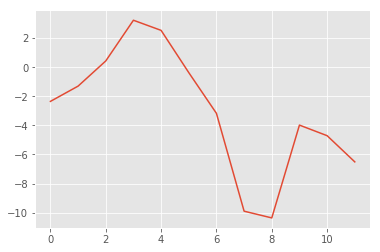

In [143]:
# Compute Heart Rate & show graph for user1 # 

Heart_result_u2=[]
Heart_result_u2.append([])
Heart_result_u2.append([])
Heart_result_u2.append([])
user2_threshold = 0.01


for i in range(len(vHeart_u2)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
    for j in range(len(vHeart_u2[i])) :
        _peaks, _ = find_peaks(vHeart_u2[i][j], height=user2_threshold, distance=500)

        if len(_peaks) != 0 :
            peak_value = []
            
            for peak_index in _peaks : 
                peak_value.append(vHeart_u2[i][j][peak_index]) 
                
            max_peak = np.max(peak_value)
            max_peak_index = _peaks[peak_value.index(max_peak)]
            print("max_peak :",max_peak)
            print("max_peak_index :", max_peak_index)

        vHeart_u2[i][j] = [60 / ((_peaks[t] - _peaks[t-1])/2000) for t in range(1, len(_peaks))]

        peak_sec = [_peaks/2000 for _peaks in _peaks if _peaks/2000 <= 3]
        peak_befo = peak_sec.index(np.max(peak_sec))
        peak_after = peak_befo + 1


        avg_heart = np.mean(vHeart_u2[i][j][:peak_befo])
        vHeart_u2[i][j] = vHeart_u2[i][j] - avg_heart    

        plt.axis(option='auto')
        
        if(len(_peaks)>=1) : 
            print("pleasant or unpleasant")
            Heart_result_u2[i].append(1)
        else :
            print("neutral")
            Heart_result_u2[i].append(0)

        plt.plot(vHeart_u2[i][j])
        plt.show()
        print("\n")

* Heart Mean Data by emotion *

**************** Neutral ****************



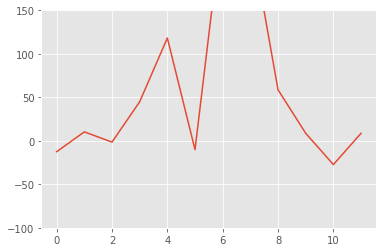

**************** Pleasant ****************



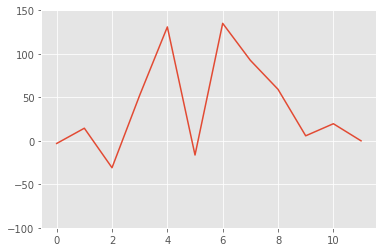

**************** Unpleasant ****************



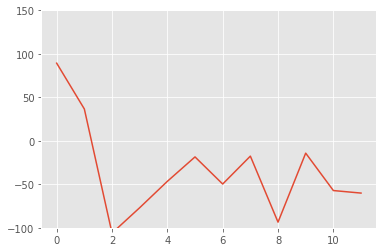

In [128]:
# Mean for user1 by subject #

num_max = 0

for i in range(len(vHeart_u1)) :
    for j in range(len(vHeart_u1[i])) :
        if(num_max <= len(vHeart_u1[i][j]) ):
            num_max = len(vHeart_u1[i][j])


heart_mean = []
heart_mean.append([]) # for neutral
heart_mean.append([]) # for plesant
heart_mean.append([]) # for unplesant


numHeart = len(vHeart_u1[i][j])

print("* Heart Mean Data by emotion *\n")
for i in range(len(vHeart_u1)) : # Subject
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
        
    for m in range(num_max) :
        sum = 0
        for j in range(len(vHeart_u1[i])) : # Add corresponding column by row
            if(len(vHeart_u1[i][j]) <= m) : continue
            sum += vHeart_u1[i][j][m]
        heart_mean[i].append(np.mean(sum))
    plt.ylim(-100,150)
    plt.plot(heart_mean[i])
    plt.show()

* Heart Mean Data by emotion *

**************** Neutral ****************



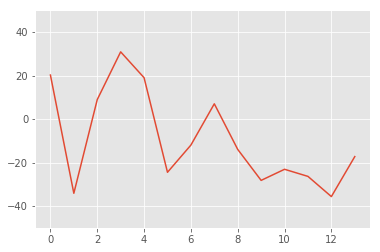

**************** Pleasant ****************



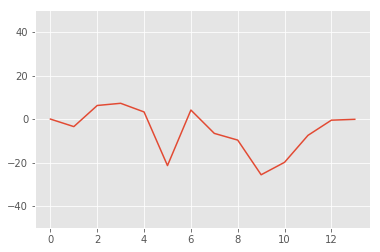

**************** Unpleasant ****************



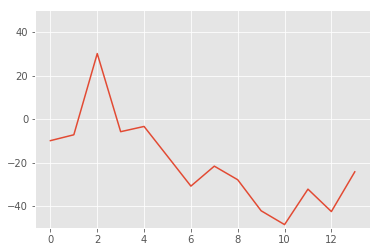

In [133]:
# Mean for user2 by subject #

num_max = 0

for i in range(len(vHeart_u2)) :
    for j in range(len(vHeart_u2[i])) :
        if(num_max <= len(vHeart_u2[i][j]) ):
            num_max = len(vHeart_u2[i][j])


heart_mean2 = []
heart_mean2.append([]) # for neutral
heart_mean2.append([]) # for plesant
heart_mean2.append([]) # for unplesant


numHeart2 = len(vHeart_u2[i][j])

print("* Heart Mean Data by emotion *\n")
for i in range(len(vHeart_u2)) : # Subject
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
        
    for m in range(num_max) :
        sum = 0
        for j in range(len(vHeart_u2[i])) :
            if(len(vHeart_u2[i][j]) <= m) : continue
            sum += vHeart_u2[i][j][m]
        heart_mean2[i].append(np.mean(sum))
    plt.ylim(-50,50)
    plt.plot(heart_mean2[i])
    plt.show()

12 14
12 14
12 14
* Heart Mean Data by emotion *

**************** Neutral ****************



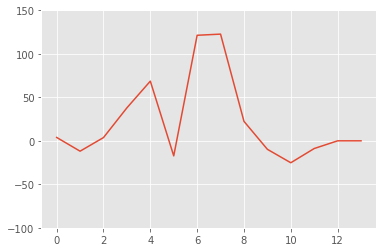

**************** Pleasant ****************



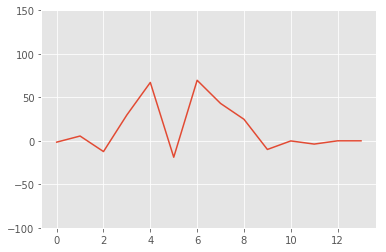

**************** Unpleasant ****************



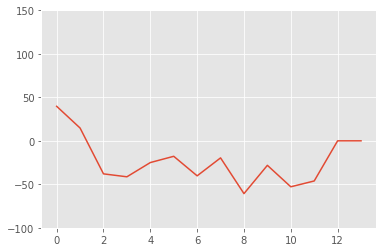

In [132]:
# Total Mean for user1 by subject #

heart_mean_Total = []
heart_mean_Total.append([]) # for neutral
heart_mean_Total.append([]) # for plesant
heart_mean_Total.append([]) # for unplesant



print(len(heart_mean[0]),len(heart_mean2[0]))
print(len(heart_mean[1]),len(heart_mean2[1]))
print(len(heart_mean[2]),len(heart_mean2[2]))

print("* Heart Mean Data by emotion *\n")

for i in range(3) : # Subject
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
    
    for j in range(14) :
        
        if j >= len(vHeart_u1[i]) :u1_data = 0
        else : u1_data = heart_mean[i][j]
            
        if j >= len(vHeart_u2[i]) : u2_data = 0
        else : u2_data = heart_mean2[i][j]

        heart_mean_Total[i].append((u1_data + u2_data)/2)
        
    plt.ylim(-100,150)
    plt.plot(heart_mean_Total[i])
    plt.show()